In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
import pandas as pd

# 读取CSV文件
file_path = "housing.csv"  # 替换为您的文件路径
df = pd.read_csv(file_path)

# 去除所有包含缺失值的行
df_cleaned = df.dropna()

# 将清理后的数据保存回原文件
df_cleaned.to_csv(file_path, index=False)

print(f"已移除所有包含缺失值的行，剩余数据：{df_cleaned.shape[0]} 行。")


已移除所有包含缺失值的行，剩余数据：12469 行。


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
import pandas as pd
import numpy as np
from pysal.lib import weights
from pysal.explore import esda

# 读取数据
df = pd.read_csv('housing.csv')

# 提取经纬度
coordinates = df[['longitude', 'latitude']].values

# 创建空间权重矩阵（基于 KNN 的权重矩阵）
w = weights.KNN.from_array(coordinates, k=10)

# 计算莫兰指数
y = df['median_house_value'].values
moran = esda.Moran(y, w)

# 打印结果
print(f"Moran's I: {moran.I}")
print(f"p-value: {moran.p_sim}")
print(f"z-statistic: {moran.z_sim}")

# 根据结果判断空间自相关性
if moran.p_sim < 0.05:
    print("存在显著的空间自相关性")
else:
    print("没有显著的空间自相关性")


Moran's I: 0.7597541439715844
p-value: 0.001
z-statistic: 200.3482735196233
存在显著的空间自相关性


D:\anaconda\envs\shulitongji\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31354 (\N{CJK UNIFIED IDEOGRAPH-7A7A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\shulitongji\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\shulitongji\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28382 (\N{CJK UNIFIED IDEOGRAPH-6EDE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\shulitongji\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\shulitongji\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing fro

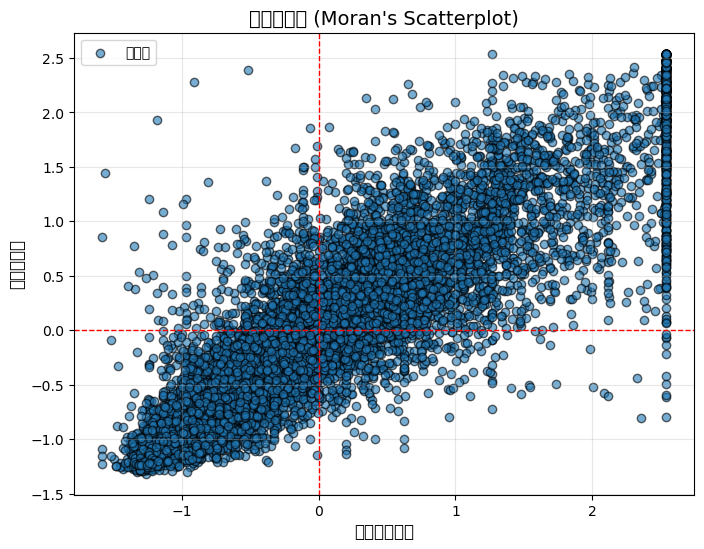

Moran's I: 0.7597541439715844
Z-统计量: 200.64269304438838
p-value: 0.001


In [135]:
import pandas as pd
import numpy as np
from pysal.lib import weights
from pysal.explore import esda
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv('housing.csv')

# 提取经纬度
coordinates = df[['longitude', 'latitude']].values

# 创建空间权重矩阵（基于最近邻的权重矩阵）
w = weights.KNN.from_array(coordinates, k=10)

# 使用房价作为变量进行分析
y = df['median_house_value'].values

# 标准化变量（中心化）
y_standardized = (y - y.mean()) / y.std()

# 计算莫兰指数
moran = esda.Moran(y, w)

# 获得空间滞后值
w.transform = 'r'  # 行标准化
y_lagged = weights.spatial_lag.lag_spatial(w, y_standardized)

# 绘制莫兰散点图
plt.figure(figsize=(8, 6))
plt.scatter(y_standardized, y_lagged, alpha=0.6, edgecolor='k', label="数据点")
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # y=0
plt.axvline(0, color='red', linestyle='--', linewidth=1)  # x=0
plt.xlabel("标准化变量值", fontsize=12)
plt.ylabel("空间滞后值", fontsize=12)
plt.title("莫兰散点图 (Moran's Scatterplot)", fontsize=14)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# 输出莫兰指数和统计量
print(f"Moran's I: {moran.I}")
print(f"Z-统计量: {moran.z_norm}")
print(f"p-value: {moran.p_sim}")


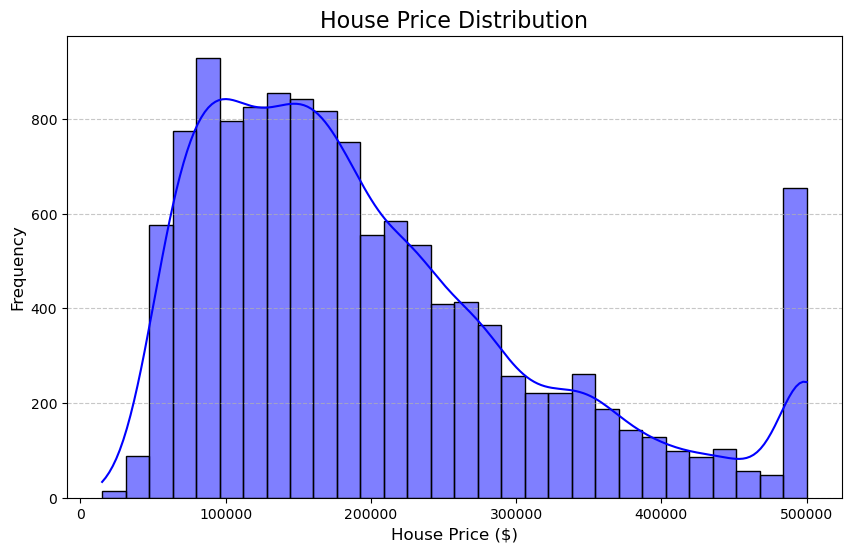

In [47]:
# 提取房屋价格数据
prices = df['median_house_value']

# 绘制直方图和核密度估计图
plt.figure(figsize=(10, 6))
sns.histplot(prices, kde=True, bins=30, color='blue', edgecolor='black')
plt.title("House Price Distribution", fontsize=16)
plt.xlabel("House Price ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [74]:
import pandas as pd
import geopandas as gpd
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW
from sklearn.preprocessing import StandardScaler

# 导入数据
data = pd.read_csv("housing.csv")

# 创建GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))
scaler = StandardScaler()
data[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income']] = scaler.fit_transform(data[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income']])
coords = list(zip(data.longitude, data.latitude))  # 提取坐标
y = data['median_house_value'].values.reshape(-1, 1)   # 因变量
X = data[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income']].values         # 自变量

# 选择带宽
bw = Sel_BW(coords, y, X).search()
print(f"最佳带宽为: {bw}")
model = GWR(coords, y, X, bw)
results = model.fit()

# 输出回归结果
print(results.summary)


最佳带宽为: 82.0
<bound method GWRResults.summary of <mgwr.gwr.GWRResults object at 0x0000027331C9D7B0>>


In [84]:
print(results.summary)

<bound method GWRResults.summary of <mgwr.gwr.GWRResults object at 0x0000027331C9D7B0>>


In [80]:
# 设置目标变量和特征变量
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
        'total_bedrooms', 'population', 'households', 'median_income']]
y = df['median_house_value']

# 拆分数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [82]:
# 创建多元线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 输出回归系数
print("回归系数：", model.coef_)
print("截距：", model.intercept_)
# 在测试集上预测
y_pred = model.predict(X_test)
# 计算均方误差和R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"均方误差 (MSE)：{mse:.2f}")
print(f"决定系数 (R²)：{r2:.2f}")


回归系数： [-4.05343523e+04 -4.01561559e+04  1.01371485e+03 -3.84808760e+00
  8.84792932e+01 -2.91295573e+01  2.13865597e+01  3.97004399e+04]
截距： -3399246.0064455247
均方误差 (MSE)：4566340795.50
决定系数 (R²)：0.67


In [125]:
# 设置目标变量和特征变量
X = df[['housing_median_age', 'total_rooms', 
        'total_bedrooms', 'population', 'households', 'median_income']]
y = df['median_house_value']

# 拆分数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [127]:
# 创建多元线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 输出回归系数
print("回归系数：", model.coef_)
print("截距：", model.intercept_)
# 在测试集上预测
y_pred = model.predict(X_test)
# 计算均方误差和R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"均方误差 (MSE)：{mse:.2f}")
print(f"决定系数 (R²)：{r2:.2f}")


回归系数： [ 1.70015203e+03 -1.48142762e+01  8.23977173e+01 -2.57824765e+01
  9.07950971e+01  4.81512060e+04]
截距： -46808.7060144656
均方误差 (MSE)：5546353227.22
决定系数 (R²)：0.60
